In [5]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

# Overview

On this occasion we tried to make an analysis using sustainable energy data. This data is collected from several sources such as the World Bank, the International Energy Agency, and ourworldindata.org with 3649 data with feature information as below:

* **Entity**: The name of the country or region for which the data is reported.
* **Year**: The year for which the data is reported, ranging from 2000 to 2020.
* **Access to electricity (% of population)**: The percentage of population with access to electricity.
* **Access to clean fuels for cooking (% of population)**: The percentage of the population with primary reliance on clean fuels.
* **Renewable-electricity-generating-capacity-per-capita**: Installed Renewable energy capacity per person
* **Financial flows to developing countries** : Aid and assistance from developed countries for clean energy projects.
* **Renewable energy share in total final energy consumption** : Percentage of renewable energy in final energy consumption.
* **Electricity from fossil fuels (TWh)**: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
* **Electricity from nuclear (TWh)**: Electricity generated from nuclear power in terawatt-hours.
* **Electricity from renewables (TWh)**: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
* **Low-carbon electricity (% electricity)**: Percentage of electricity from low-carbon sources (nuclear and renewables).
* **Primary energy consumption per capita (kWh/person)**: Energy consumption per person in kilowatt-hours.
* **Energy intensity level of primary energy** : Energy use per unit of GDP at purchasing power parity.
* **Value_co2_emissions (metric tons per capita)**: Carbon dioxide emissions per person in metric tons.
* **Renewables (% equivalent primary energy)**: Equivalent primary energy that is derived from renewable sources.
* **GDP growth (annual %)**: Annual GDP growth rate based on constant local currency.
* **GDP per capita**: Gross domestic product per person.
* **Density (P/Km2)**: Population density in persons per square kilometer.
* **Land Area (Km2)**: Total land area in square kilometers.
* **Latitude**: Latitude of the country's centroid in decimal degrees.
* **Longitude**: Longitude of the country's centroid in decimal degrees.

Dataset can be access through this [link](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy). The objective of this analysis is for making prediction value for carbon emission.

In [6]:
df = pd.read_csv('dataset/global-data-on-sustainable-energy (1).csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [7]:
df.shape

(3649, 21)

In [8]:
df['Value_co2_emissions_kt_by_country'].describe()

count    3.221000e+03
mean     1.598665e+05
std      7.736611e+05
min      1.000000e+01
25%      2.020000e+03
50%      1.050000e+04
75%      6.058000e+04
max      1.070722e+07
Name: Value_co2_emissions_kt_by_country, dtype: float64

Value_co2_emissions_kt_by_country > mean

In [10]:
import scipy.stats as stats
import math

# Menentukan jumlah kejadian ukuran sampel (n), proporsi pada null hypothesis, dan proporsi sample
n = 3649
p = 0.49
p_hat = 0.50

In [11]:
# Hitung uji statistik
test_stat=(p_hat-p)/(math.sqrt((p*(1-p))/(n)))
print(test_stat)

1.2083807651686014


In [12]:
#Interpretasi hasil
print("Dari program di atas hasil uji statistik adalah : ", test_stat)

Dari program di atas hasil uji statistik adalah :  1.2083807651686014


In [13]:
# Nilai Critical Value berdasarkan critical Z-value dari Z-table dengan nilai alpha 0.05
#Import package
import scipy.stats as stats
z_crit=stats.norm.ppf(1-0.05)  # right-tailed test
print(z_crit)

1.6448536269514722


In [14]:
#Interpretasi hasil
print("Dengan nilai uji statistik", test_stat," dan nilai z_crit", stats.norm.ppf(1-0.05) )

Dengan nilai uji statistik 1.2083807651686014  dan nilai z_crit 1.6448536269514722


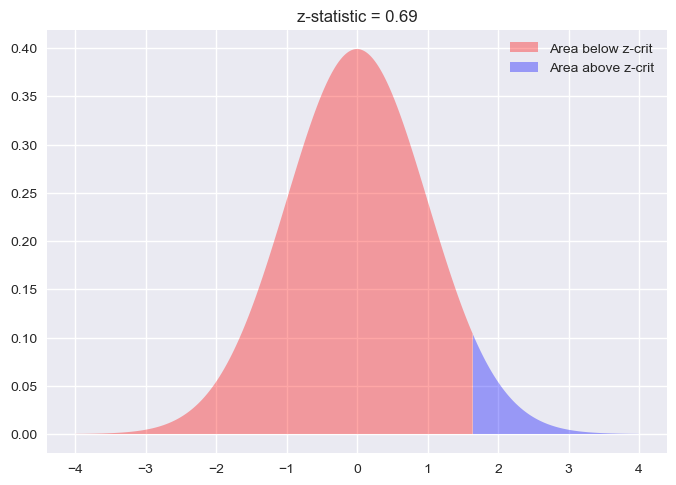

In [15]:
# Visualisasi
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.645,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.645,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-crit'
                 )

plt.fill_between(x=np.arange(1.645,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.645,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-crit')
plt.legend()
plt.title ('z-statistic = 0.69');

In [16]:
# Menentukan aturan keputusan
if test_stat>z_crit:
    print("Tolak null hypothesis")
else:
    print("Gagal tolak null hypothesis")

Gagal tolak null hypothesis


# Data Preprocessing

## Feature Selections

<AxesSubplot:>

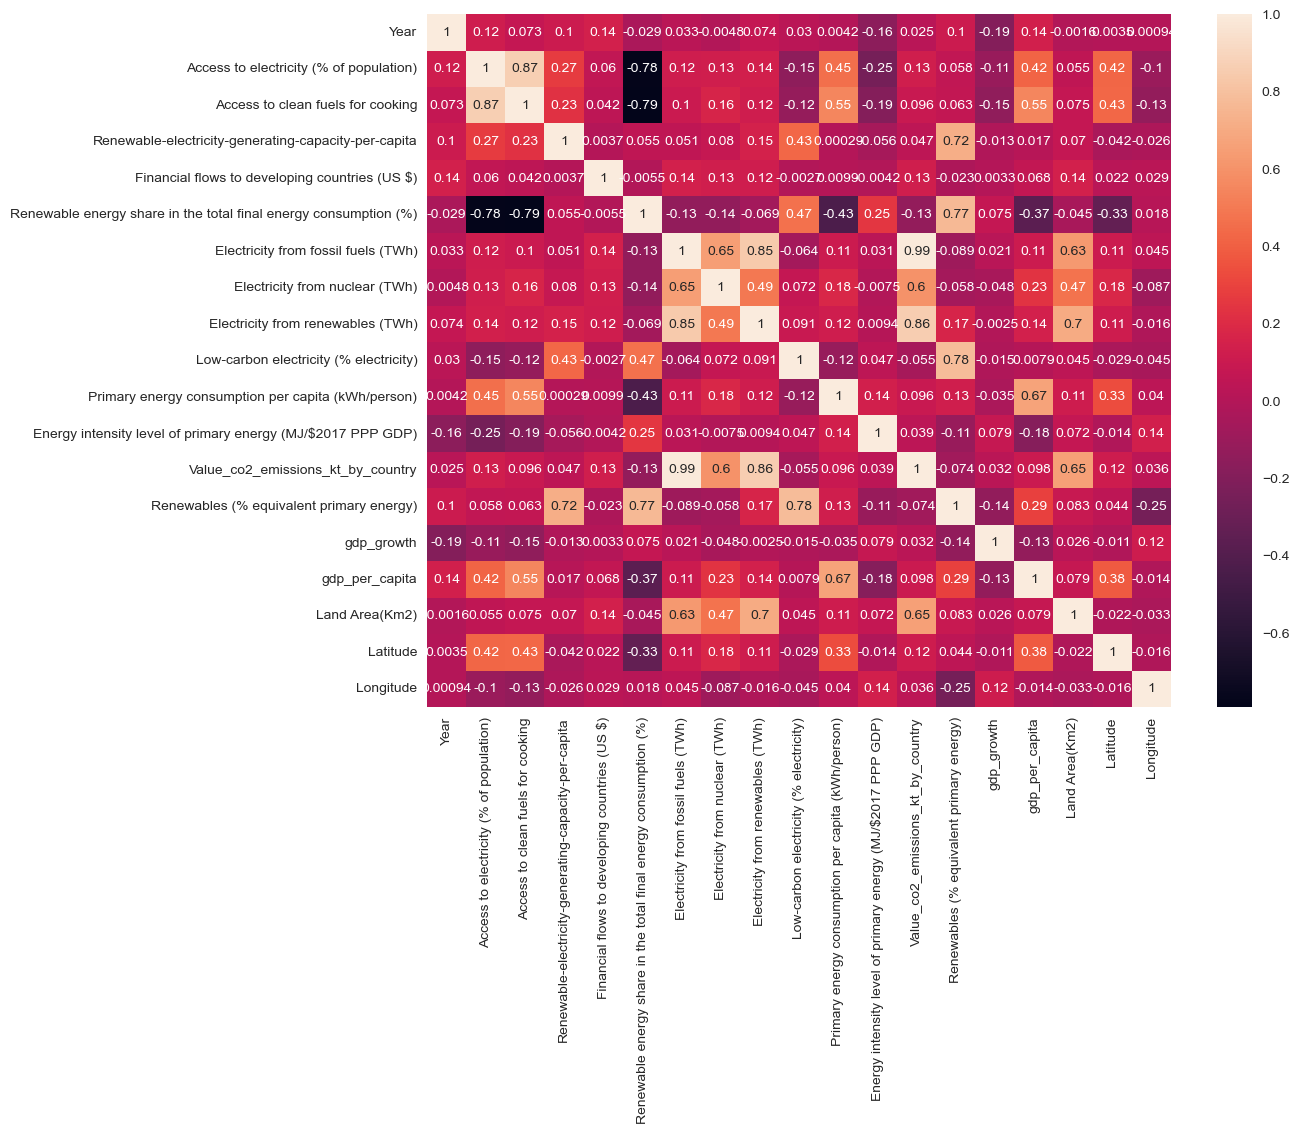

In [34]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True)

In [35]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

Value_co2_emissions_kt_by_country // Electricity from nuclear (TWh), Electricity from renewables (TWh), Land Area(Km2)

In [36]:
df_carbon_emission = df[['Value_co2_emissions_kt_by_country', 'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Land Area(Km2)']]
df_carbon_emission.head()

,Value_co2_emissions_kt_by_country,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Land Area(Km2)
0,760.000000,0.16,0.31,652230.0
1,730.000000,0.09,0.50,652230.0
2,1029.999971,0.13,0.56,652230.0
3,1220.000029,0.31,0.63,652230.0
4,1029.999971,0.33,0.56,652230.0


## Missing Values

In [37]:
df_carbon_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Value_co2_emissions_kt_by_country    3221 non-null   float64
 1   Electricity from fossil fuels (TWh)  3628 non-null   float64
 2   Electricity from renewables (TWh)    3628 non-null   float64
 3   Land Area(Km2)                       3648 non-null   float64
dtypes: float64(4)
memory usage: 114.2 KB


In [38]:
df_carbon_emission.isnull().sum()

Value_co2_emissions_kt_by_country      428
Electricity from fossil fuels (TWh)     21
Electricity from renewables (TWh)       21
Land Area(Km2)                           1
dtype: int64

<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country', ylabel='Count'>

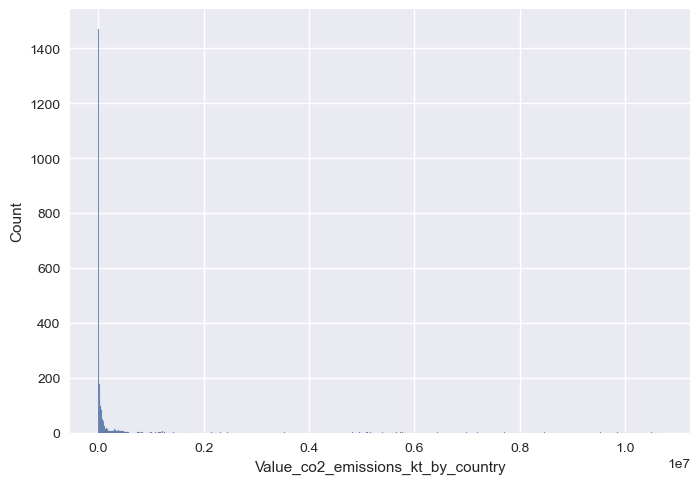

In [39]:
sns.histplot(df_carbon_emission.Value_co2_emissions_kt_by_country)

<AxesSubplot:xlabel='Electricity from fossil fuels (TWh)', ylabel='Count'>

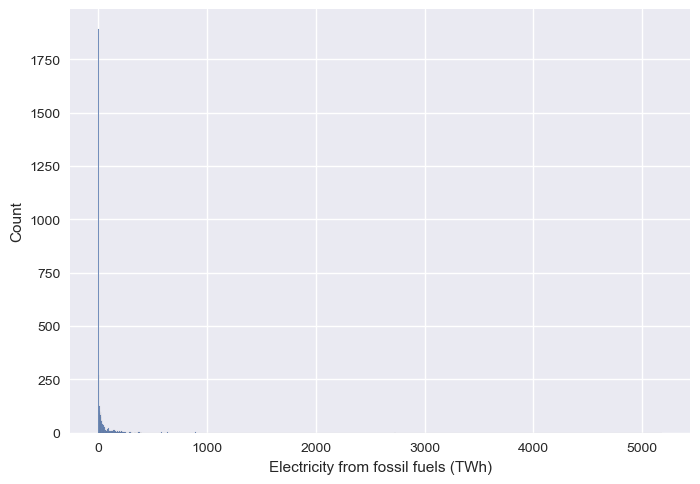

In [40]:
sns.histplot(df_carbon_emission['Electricity from fossil fuels (TWh)'])

<AxesSubplot:xlabel='Electricity from renewables (TWh)', ylabel='Count'>

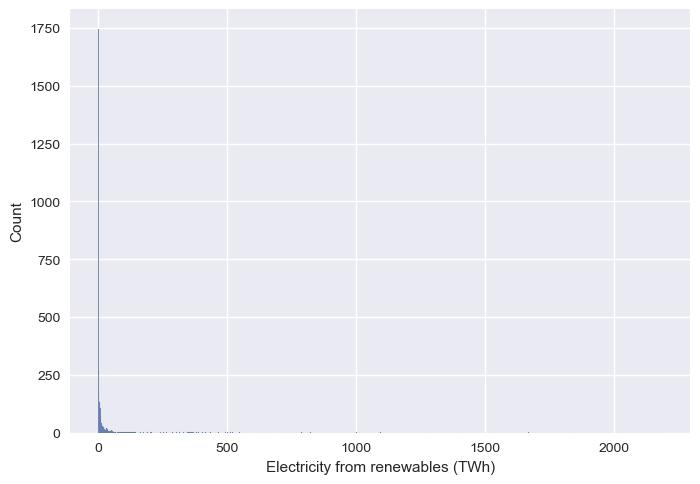

In [41]:
sns.histplot(df_carbon_emission['Electricity from renewables (TWh)'])

<AxesSubplot:xlabel='Land Area(Km2)', ylabel='Count'>

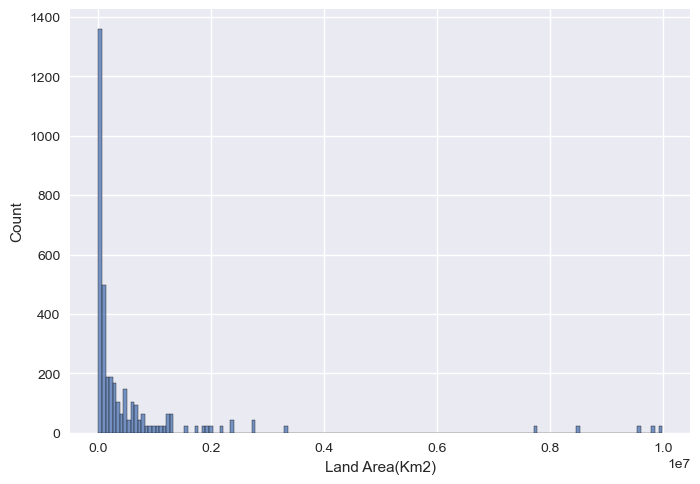

In [42]:
sns.histplot(df_carbon_emission['Land Area(Km2)'])

In [43]:
df_carbon_emission['Land Area(Km2)'].dropna(axis=0, inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_4564\1925863229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carbon_emission['Land Area(Km2)'].dropna(axis=0, inplace=True)


In [44]:
df_carbon_emission

,Value_co2_emissions_kt_by_country,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Land Area(Km2)
0,760.000000,0.16,0.31,652230.0
1,730.000000,0.09,0.50,652230.0
2,1029.999971,0.13,0.56,652230.0
3,1220.000029,0.31,0.63,652230.0
4,1029.999971,0.33,0.56,652230.0
...,...,...,...,...
3644,11020.000460,3.50,3.32,390757.0
3645,10340.000150,3.05,4.30,390757.0
3646,12380.000110,3.73,5.46,390757.0
3647,11760.000230,3.66,4.58,390757.0


In [45]:
df_carbon_emission.Value_co2_emissions_kt_by_country.fillna(df_carbon_emission.Value_co2_emissions_kt_by_country.median(), inplace=True)
df_carbon_emission['Electricity from fossil fuels (TWh)'].fillna(df_carbon_emission['Electricity from fossil fuels (TWh)'].median(), inplace=True)
df_carbon_emission['Electricity from renewables (TWh)'].fillna(df_carbon_emission['Electricity from renewables (TWh)'].median(), inplace=True)
df_carbon_emission['Land Area(Km2)'].fillna(df_carbon_emission['Land Area(Km2)'].median(), inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_4564\4288523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carbon_emission.Value_co2_emissions_kt_by_country.fillna(df_carbon_emission.Value_co2_emissions_kt_by_country.median(), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_4564\4288523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carbon_emission['Electricity from fossil fuels (TWh)'].fillna(df_carbon_emission['Electricity from fossil fuels (TWh)'].median(), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_4564\4288523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

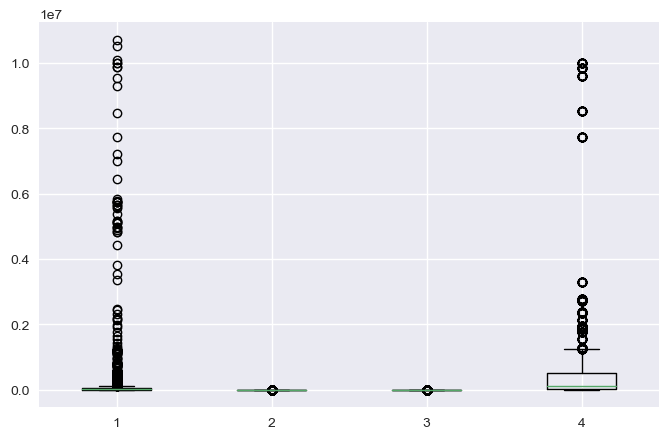

In [59]:
# df_carbon_emission.isnull().sum()
plt.figure(figsize=(8,5))
plt.boxplot(df_carbon_emission)
plt.show()

## Outlier

In [61]:
# plt.figure(figsize=(10,9))
df_carbon_emission

,Value_co2_emissions_kt_by_country,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Land Area(Km2)
0,760.000000,0.16,0.31,652230.0
1,730.000000,0.09,0.50,652230.0
2,1029.999971,0.13,0.56,652230.0
3,1220.000029,0.31,0.63,652230.0
4,1029.999971,0.33,0.56,652230.0
...,...,...,...,...
3644,11020.000460,3.50,3.32,390757.0
3645,10340.000150,3.05,4.30,390757.0
3646,12380.000110,3.73,5.46,390757.0
3647,11760.000230,3.66,4.58,390757.0


In [62]:
q1 = df_carbon_emission.Value_co2_emissions_kt_by_country.quantile(0.25)
q3 = df_carbon_emission.Value_co2_emissions_kt_by_country.quantile(0.75)

In [63]:
interquartil = q3-q1
up_limit = q3 + 1.5 * interquartil
low_limit = q1 - 1.5 * interquartil

In [64]:
df_carbon_emission[(df_carbon_emission.Value_co2_emissions_kt_by_country > low_limit) & (df_carbon_emission.Value_co2_emissions_kt_by_country < up_limit)]

,Value_co2_emissions_kt_by_country,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Land Area(Km2)
0,760.000000,0.16,0.31,652230.0
1,730.000000,0.09,0.50,652230.0
2,1029.999971,0.13,0.56,652230.0
3,1220.000029,0.31,0.63,652230.0
4,1029.999971,0.33,0.56,652230.0
...,...,...,...,...
3644,11020.000460,3.50,3.32,390757.0
3645,10340.000150,3.05,4.30,390757.0
3646,12380.000110,3.73,5.46,390757.0
3647,11760.000230,3.66,4.58,390757.0


In [65]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile
    low_limit = quartile1 - 1.5 * interquartile
    return low_limit, up_limit

In [66]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if (low_limit == 0) & (up_limit == 0):
        return False
    elif dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
# ```for col in columns_:
#     print(col, check_outlier(insurance, col))

In [67]:
for col in df_carbon_emission.columns:
    print(col, check_outlier(df_carbon_emission, col))

Value_co2_emissions_kt_by_country True
Electricity from fossil fuels (TWh) True
Electricity from renewables (TWh) True
Land Area(Km2) True


In [68]:
df_carbon_emission_2 = df_carbon_emission.copy()
for col in df_carbon_emission_2.columns:
    print(col, check_outlier(df_carbon_emission_2, col))

Value_co2_emissions_kt_by_country True
Electricity from fossil fuels (TWh) True
Electricity from renewables (TWh) True
Land Area(Km2) True


In [69]:
def process_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    dataframe_ = dataframe[(dataframe[col_name] <= up_limit) & (dataframe[col_name] >= low_limit)]
    return dataframe_

### Value_co2_emissions_kt_by_country_fixed

In [70]:
df_carbon_emission_2['Value_co2_emissions_kt_by_country_fixed'] = np.where(
    df_carbon_emission_2['Value_co2_emissions_kt_by_country'] > outlier_thresholds(df_carbon_emission_2,'Value_co2_emissions_kt_by_country')[1],
    outlier_thresholds(df_carbon_emission_2,'Value_co2_emissions_kt_by_country')[1],
    np.where(
        df_carbon_emission_2['Value_co2_emissions_kt_by_country'] < outlier_thresholds(df_carbon_emission_2,'Value_co2_emissions_kt_by_country')[0],
        outlier_thresholds(df_carbon_emission_2,'Value_co2_emissions_kt_by_country')[0],
        df_carbon_emission_2['Value_co2_emissions_kt_by_country']
    )
)

In [71]:
df_carbon_emission_2[df_carbon_emission_2['Value_co2_emissions_kt_by_country_fixed'] >= outlier_thresholds(df_carbon_emission_2,'Value_co2_emissions_kt_by_country')[1]]

,Value_co2_emissions_kt_by_country,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Land Area(Km2),Value_co2_emissions_kt_by_country_fixed
54,134929.9927,53.36,0.62,2381741.0,124560.00459
55,139020.0043,55.99,0.33,2381741.0,124560.00459
56,147740.0055,60.15,0.25,2381741.0,124560.00459
57,156270.0043,64.46,0.22,2381741.0,124560.00459
58,154910.0037,66.43,0.34,2381741.0,124560.00459
...,...,...,...,...,...
3548,124839.9963,38.48,8.92,447400.0,124560.00459
3550,127360.0006,39.25,4.65,447400.0,124560.00459
3552,128880.0049,35.76,4.44,447400.0,124560.00459
3554,126239.9979,41.16,8.11,447400.0,124560.00459


In [72]:
outlier_thresholds(df_carbon_emission_2,'Value_co2_emissions_kt_by_country')

(-70720.00277, 124560.00459)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country_fixed'>

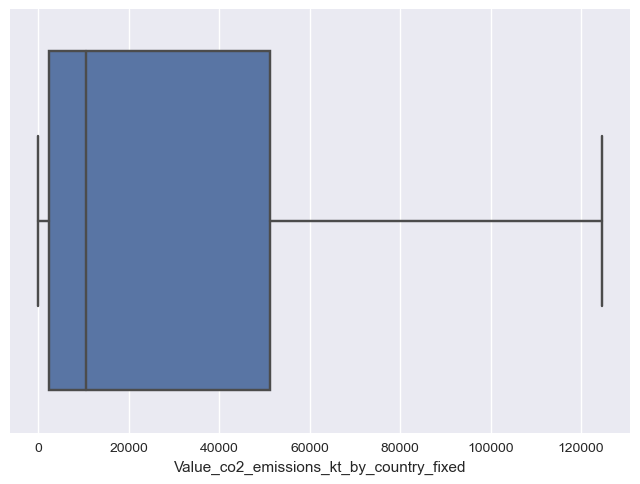

In [90]:
# plt.figure(figsize=(12,9))
sns.boxplot(df_carbon_emission_2['Value_co2_emissions_kt_by_country_fixed'])

### Electricity from fossil fuels (TWh)

In [74]:
df_carbon_emission_2['Electricity from fossil fuels (TWh)']
for col in df_carbon_emission_2.columns:
    print(col, check_outlier(df_carbon_emission_2, col))

Value_co2_emissions_kt_by_country True
Electricity from fossil fuels (TWh) True
Electricity from renewables (TWh) True
Land Area(Km2) True
Value_co2_emissions_kt_by_country_fixed False


In [75]:
df_carbon_emission_2['Electricity_from_fossil_fuels_TWh_fixed'] = np.where(
    df_carbon_emission_2['Electricity from fossil fuels (TWh)'] > outlier_thresholds(df_carbon_emission_2,'Electricity from fossil fuels (TWh)')[1],
    outlier_thresholds(df_carbon_emission_2,'Electricity from fossil fuels (TWh)')[1],
    np.where(
        df_carbon_emission_2['Electricity from fossil fuels (TWh)'] < outlier_thresholds(df_carbon_emission_2,'Electricity from fossil fuels (TWh)')[0],
        outlier_thresholds(df_carbon_emission_2,'Electricity from fossil fuels (TWh)')[0],
        df_carbon_emission_2['Electricity from fossil fuels (TWh)']
    )
)

In [76]:
outlier_thresholds(df_carbon_emission_2,'Electricity from fossil fuels (TWh)')

(-39.03, 65.85)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Electricity_from_fossil_fuels_TWh_fixed'>

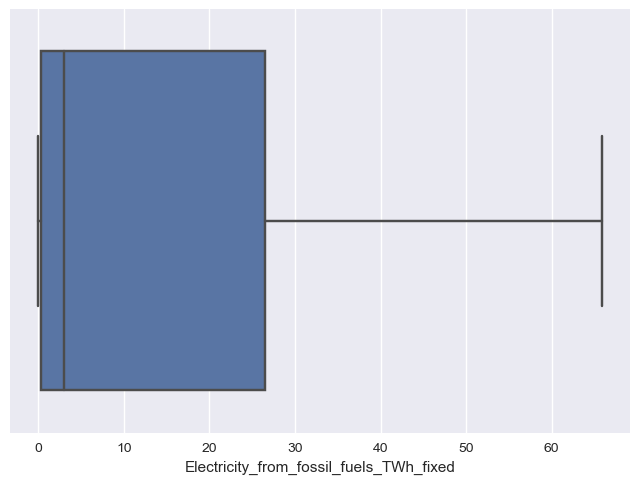

In [77]:
sns.boxplot(df_carbon_emission_2['Electricity_from_fossil_fuels_TWh_fixed'])

### Electricity from renewables (TWh)

In [78]:
for col in df_carbon_emission_2.columns:
    print(col, check_outlier(df_carbon_emission_2, col))

Value_co2_emissions_kt_by_country True
Electricity from fossil fuels (TWh) True
Electricity from renewables (TWh) True
Land Area(Km2) True
Value_co2_emissions_kt_by_country_fixed False
Electricity_from_fossil_fuels_TWh_fixed False


In [79]:
df_carbon_emission_2['Electricity_from_renewables_TWh_fixed'] = np.where(
    df_carbon_emission_2['Electricity from renewables (TWh)'] > outlier_thresholds(df_carbon_emission_2,'Electricity from renewables (TWh)')[1],
    outlier_thresholds(df_carbon_emission_2,'Electricity from renewables (TWh)')[1],
    np.where(
        df_carbon_emission_2['Electricity from renewables (TWh)'] < outlier_thresholds(df_carbon_emission_2,'Electricity from renewables (TWh)')[0],
        outlier_thresholds(df_carbon_emission_2,'Electricity from renewables (TWh)')[0],
        df_carbon_emission_2['Electricity from renewables (TWh)']
    )
)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Electricity_from_renewables_TWh_fixed'>

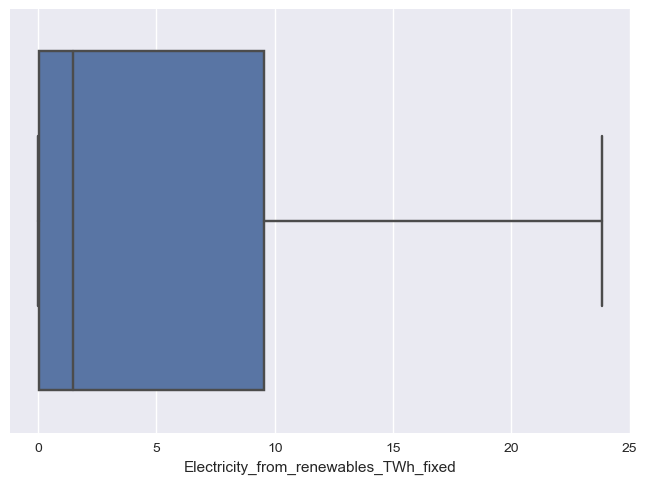

In [80]:
sns.boxplot(df_carbon_emission_2['Electricity_from_renewables_TWh_fixed'])

In [82]:
# sns.boxplot(df_carbon_emission_2.iloc[:,4:])

### Land Area(Km2)

In [87]:
for col in df_carbon_emission_2.columns:
    print(col, check_outlier(df_carbon_emission_2, col))

Value_co2_emissions_kt_by_country True
Electricity from fossil fuels (TWh) True
Electricity from renewables (TWh) True
Land Area(Km2) True
Value_co2_emissions_kt_by_country_fixed False
Electricity_from_fossil_fuels_TWh_fixed False
Electricity_from_renewables_TWh_fixed False


In [88]:
df_carbon_emission_2['Land_area_km2'] = np.where(
    df_carbon_emission_2['Land Area(Km2)'] > outlier_thresholds(df_carbon_emission_2,'Land Area(Km2)')[1],
    outlier_thresholds(df_carbon_emission_2,'Land Area(Km2)')[1],
    np.where(
        df_carbon_emission_2['Land Area(Km2)'] < outlier_thresholds(df_carbon_emission_2,'Land Area(Km2)')[0],
        outlier_thresholds(df_carbon_emission_2,'Land Area(Km2)')[0],
        df_carbon_emission_2['Land Area(Km2)']
    )
)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Land_area_km2'>

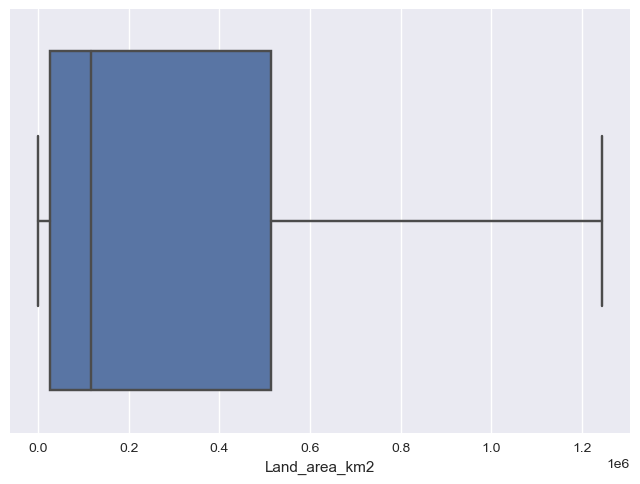

In [89]:
sns.boxplot(df_carbon_emission_2['Land_area_km2'])

# Build Regression Model

In [30]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame> combined estimated coefficient and standard error of model estimate
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [91]:
# Create OLS model object
model = smf.ols("Value_co2_emissions_kt_by_country_fixed ~ Electricity_from_fossil_fuels_TWh_fixed + Electricity_from_renewables_TWh_fixed + Land_area_km2", \
                df_carbon_emission_2)

# Fit the model
results_model_weight = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_weight = print_coef_std_err(results_model_weight)

In [92]:
results_weight

,coef,std err
Intercept,3442.234147,447.994087
Electricity_from_fossil_fuels_TWh_fixed,1503.037759,16.908496
Electricity_from_renewables_TWh_fixed,489.311390,46.339342
Land_area_km2,0.004919,0.000860


Value_co2_emissions_kt_by_country_fixed = 3442 + (1503 * Electricity_from_fossil_fuels_TWh_fixed) + (489 * Electricity_from_renewables_TWh_fixed) + (0.005 * Land_area_km2)

* Electricity_from_fossil_fuels_TWh_fixed = 3
* Electricity_from_renewables_TWh_fixed = 4
* Land_area_km2 = 4

In [93]:
res_1 = results_weight['coef']['Intercept'] + results_weight['coef']['Electricity_from_fossil_fuels_TWh_fixed'] * 3 \
    + results_weight['coef']['Electricity_from_renewables_TWh_fixed'] * 4 \
    + results_weight['coef']['Land_area_km2'] * 4
res_1

9908.612662501848

* Electricity_from_fossil_fuels_TWh_fixed = 4
* Electricity_from_renewables_TWh_fixed = 5
* Land_area_km2 = 5000

In [94]:
res_2 = results_weight['coef']['Intercept'] + results_weight['coef']['Electricity_from_fossil_fuels_TWh_fixed'] * 4 \
    + results_weight['coef']['Electricity_from_renewables_TWh_fixed'] * 5 \
    + results_weight['coef']['Land_area_km2'] * 5
res_2

11900.966731147188

In [60]:
diff = res_1 - res_2
diff

-1992.3540686425804

Regresi mengestimasi ketika setiap variable berbeda 1 nilai memiliki ekspetasi kurang dari 1992 nilai emissions co2

In [61]:
results_model_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     Value_co2_emissions_kt_by_country_fixed   R-squared:                       0.803
Model:                                                 OLS   Adj. R-squared:                  0.802
Method:                                      Least Squares   F-statistic:                     4938.
Date:                                     Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                                             08:06:59   Log-Likelihood:                -41238.
No. Observations:                                     3649   AIC:                         8.248e+04
Df Residuals:                                         3645   BIC:                         8.251e+04
Df Model:                                                3                                         
Covariance Type:                                 nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                3442.2341    447.994      7.684      0.000    2563.890    4320.578
Electricity_from_fossil_fuels_TWh_fixed  1503.0378     16.908     88.892      0.000    1469.887    1536.189
Electricity_from_renewables_TWh_fixed     489.3114     46.339     10.559      0.000     398.458     580.165
Land_area_km2                               0.0049      0.001      5.720      0.000       0.003       0.007
==============================================================================
Omnibus:                     2228.365   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39712.706
Skew:                          -2.580   Prob(JB):                         0.00
Kurtosis:                      18.316   Cond. No.                     7.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='Count'>

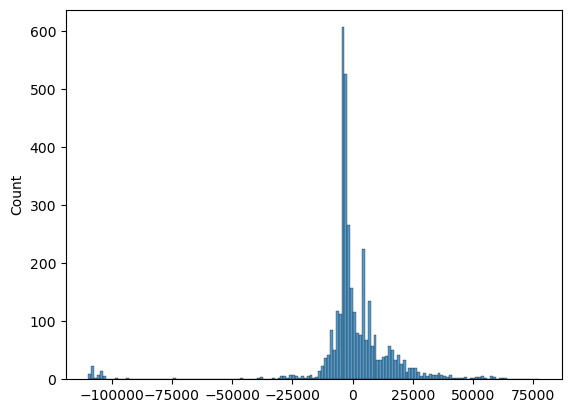

In [62]:
sns.histplot(results_model_weight.resid)

In [63]:
# # Create OLS model object
# model = smf.ols("Value_co2_emissions_kt_by_country_fixed ~ Electricity_from_fossil_fuels_TWh_fixed + Electricity_from_renewables_TWh_fixed + Land_area_km2", df_carbon_emission_2)

# # Fit the model
# results_model_weight = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_weight = print_coef_std_err(results_model_weight)

# Extract the residual of the model
residual_model_id = results_model_weight.resid.copy()

# # Extract the results (Coefficient and Standard Error) to DataFrame
# results_id = print_coef_std_err(results)

# Extract the predicted values of the model
predicted_id = results_model_weight.fittedvalues.copy()

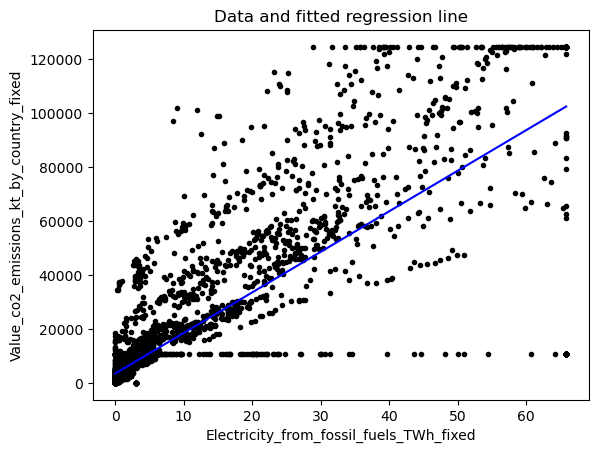

In [64]:
predictor = "Electricity_from_fossil_fuels_TWh_fixed"
outcome = "Value_co2_emissions_kt_by_country_fixed"
data = df_carbon_emission_2.copy()
results_ = results_weight.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

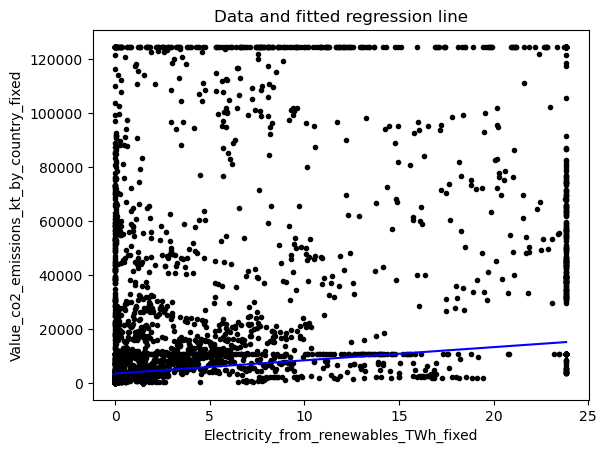

In [65]:
predictor = "Electricity_from_renewables_TWh_fixed"
outcome = "Value_co2_emissions_kt_by_country_fixed"
data = df_carbon_emission_2.copy()
results_ = results_weight.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

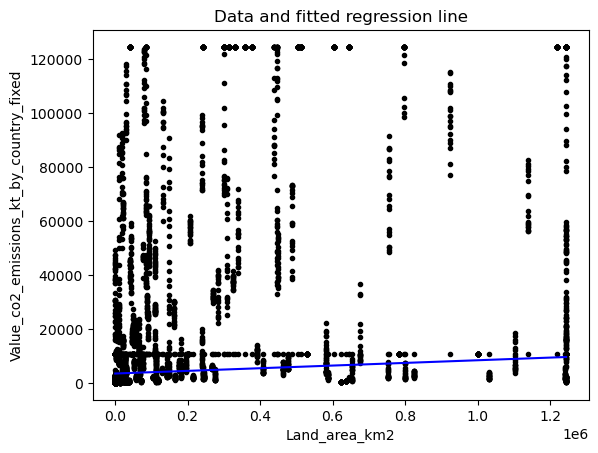

In [66]:
predictor = "Land_area_km2"
outcome = "Value_co2_emissions_kt_by_country_fixed"
data = df_carbon_emission_2.copy()
results_ = results_weight.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [67]:
results_model_weight.rsquared

0.8025327549066534

Text(0.5, 1.0, 'Residuals vs. Predicted emission')

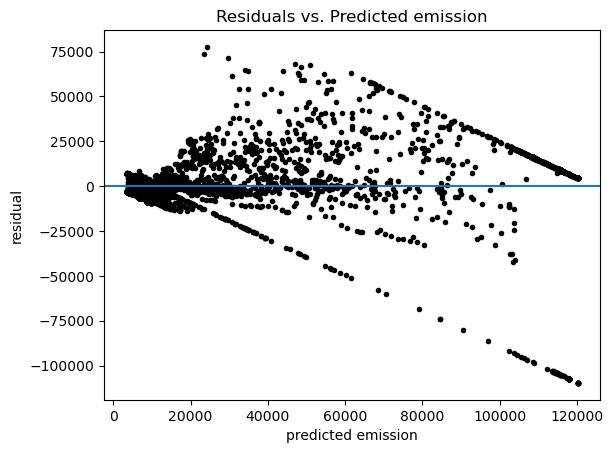

In [68]:
plt.scatter(results_model_weight.fittedvalues, results_model_weight.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted emission")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted emission")

.8 merupakan nilai varians yang bisa di jelaskan oleh model

## Normality of error assumption 

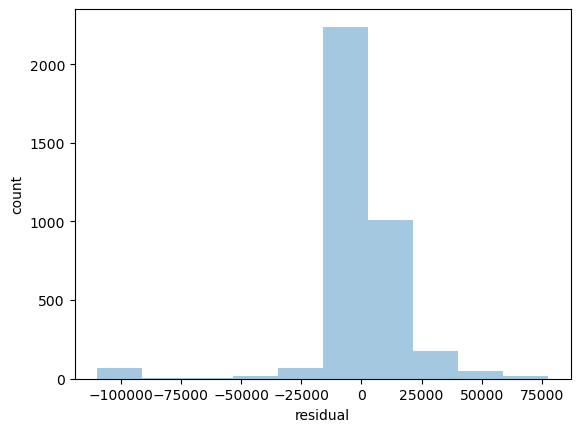

In [69]:
plt.hist(results_model_weight.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

* distribusi terbilang normal

# Prediction

In [74]:
res_pred = results_model_weight.predict()
res_pred.shape

(3649,)

In [75]:
df_carbon_emission_2.shape

(3649, 8)

In [81]:
results_model_weight.predict({
    "Electricity_from_fossil_fuels_TWh_fixed":df_carbon_emission_2['Electricity_from_fossil_fuels_TWh_fixed'],
    "Electricity_from_renewables_TWh_fixed":df_carbon_emission_2['Electricity_from_renewables_TWh_fixed'],
    "Land_area_km2":df_carbon_emission_2['Land_area_km2']
})

0        7042.796309
1        7030.552830
2        7120.033024
3        7424.831618
4        7420.640576
            ...     
3644    12249.555872
3645    12052.714043
3646    13642.380932
3647    13106.574266
3648    12524.953006
Length: 3649, dtype: float64